In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
import ODEsolver_three_nu as solve
from run_three_nu import g, temp, gs, gss
from run_three_nu import with_spline_ODE, steps_taken
from Emma_three_nu import sterile_production

In [2]:
sterile_production(1000, 0.0071, 10**(-10), 10**(-10), 10**(-10), 7.6e-4, 7.6e-4, 7.6e-4, make_plot=False, folder_name="Neutrino Data")

0.020560492239652305

In [3]:
data = np.load('Neutrino Data/three_nux0.00076x1e-10.npz') 
#data.files

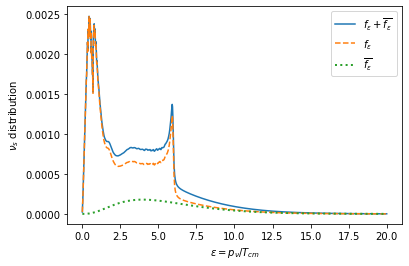

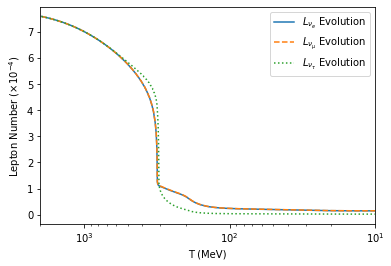

In [4]:
plt.figure()
plt.plot(data['epsilon'],data['epsilon']**2 * data['final_distribution'])
plt.plot(data['epsilon'],data['epsilon']**2 * data['sterile_evo'][-1], linestyle = '--')
plt.plot(data['epsilon'],data['epsilon']**2 * data['anti_sterile_evo'][-1], linestyle = ':', linewidth=2)
plt.legend(['$f_{\epsilon} +\overline{f_{\epsilon}}$ ', '$f_{\epsilon}$', '$\overline{f_{\epsilon}}$'])

plt.xlabel(r"$\epsilon = p_\nu / T_{cm}$")
plt.ylabel(r"$\nu_s$ distribution")
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'spectra.png'

plt.savefig(image_name, format=image_format, dpi=1200)


plt.figure()
plt.semilogx(data['T'], 10**4*data['lep_evo_e'])
plt.semilogx(data['T'], 10**4*data['lep_evo_mu'], linestyle = '--')
plt.semilogx(data['T'], 10**4*data['lep_evo_tau'], linestyle = ':')
plt.legend([r'$L_{\nu_e}$ Evolution', r'$L_{\nu_{\mu}}$ Evolution', r'$L_{\nu_{\tau}}$ Evolution'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
image_format = 'png' # e.g .png, .svg, etc.
image_name = 'leptonplot_e.png'

plt.savefig(image_name, format=image_format, dpi=1200)

## Comparing Lepton Evolution for $\nu_e, \nu_{\mu}, \nu_{\tau} \rightarrow \nu_s$ vs.  $\nu_{\alpha} \rightarrow \nu_s$ 

### electron

In [5]:
data_3 = np.load('Neutrino Data/three_nux0.00076x1e-10.npz')
data_e = np.load('Neutrino Data/electronx0.00076x1e-10.npz')
data_3.files

['T',
 'final_distribution',
 'epsilon',
 'lep_evo_e',
 'lep_evo_mu',
 'lep_evo_tau',
 'a',
 't',
 'sterile_evo',
 'anti_sterile_evo',
 'mass_s',
 'mixangv_tot',
 'Le0',
 'Lmu0',
 'Ltau0',
 'mixangv_e',
 'mixangv_mu',
 'mixangv_tau',
 'omega_h2']

Text(0, 0.5, 'Lepton Number $(\\times 10^{-4})}$')

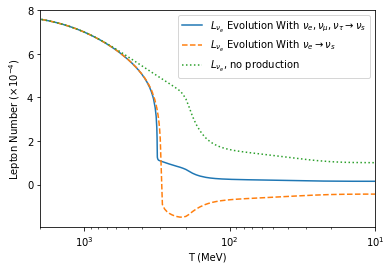

In [6]:
plt.figure()
plt.semilogx(data_3['T'], 10**4*data_3['lep_evo_e'])
plt.semilogx(data_e['T'], 10**4*data_e['lep_evo'], linestyle = '--')
plt.semilogx(data_e['T'], 10**4*data_e['initial_electron']/(data_e['a']**3*data_e['T']**3), linestyle = ':' )
plt.legend([r'$L_{\nu_e}$ Evolution With $\nu_e, \nu_{\mu}, \nu_{\tau} \rightarrow \nu_s$',r'$L_{\nu_e}$ Evolution With $\nu_{e} \rightarrow \nu_s$', r'$L_{\nu_{e}}$, no production'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'leptonplot_e.png'

### muon

In [7]:
data_mu = np.load('Neutrino Data/muonx0.00076x1e-10.npz')
#data_mu.files

Text(0, 0.5, 'Lepton Number $(\\times 10^{-4})}$')

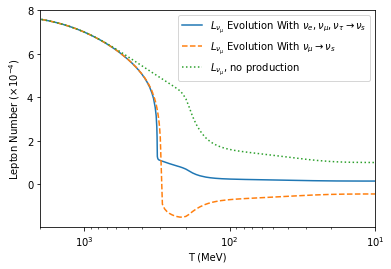

In [8]:
plt.figure()
plt.semilogx(data_3['T'], 10**4*data_3['lep_evo_mu'])
plt.semilogx(data_mu['T'], 10**4*data_mu['lep_evo'], linestyle = '--')
plt.semilogx(data_mu['T'], 10**4*data_mu['initial_mu']/(data_mu['a']**3*data_mu['T']**3), linestyle = ':' )
plt.legend([r'$L_{\nu_{\mu}}$ Evolution With $\nu_e, \nu_{\mu}, \nu_{\tau} \rightarrow \nu_s$',r'$L_{\nu_{\mu}}$ Evolution With $\nu_{\mu} \rightarrow \nu_s$', r'$L_{\nu_{\mu}}$, no production'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'leptonplot_e.png'

### tau

In [9]:
data_tau = np.load('Neutrino Data/taux0.00076x1e-10.npz')

Text(0, 0.5, 'Lepton Number $(\\times 10^{-4})}$')

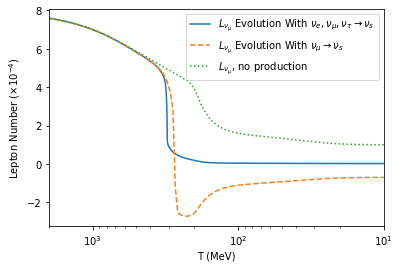

In [10]:
plt.figure()
plt.semilogx(data_3['T'], 10**4*data_3['lep_evo_tau'])
plt.semilogx(data_tau['T'], 10**4*data_tau['lep_evo'], linestyle = '--')
plt.semilogx(data_tau['T'], 10**4*data_tau['initial_tau']/(data_tau['a']**3*data_tau['T']**3), linestyle = ':' )
plt.legend([r'$L_{\nu_{\mu}}$ Evolution With $\nu_e, \nu_{\mu}, \nu_{\tau} \rightarrow \nu_s$',r'$L_{\nu_{\mu}}$ Evolution With $\nu_{\mu} \rightarrow \nu_s$', r'$L_{\nu_{\mu}}$, no production'])
plt.xlim(2000,10)
plt.xlabel("T (MeV)")
plt.ylabel(r"Lepton Number $(\times 10^{-4})}$")
#image_format = 'png' # e.g .png, .svg, etc.
#image_name = 'leptonplot_e.png'